In [1]:
import cv2
import numpy as np

# Open video file - opens a video file
cap = cv2.VideoCapture('/home/sumit/Videos/PS5.mp4')

In [2]:
# Get frame dimensions - retrieves video properties like width and height
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(width,height)

1280 720


In [3]:
fps = cap.get(cv2.CAP_PROP_FPS) # frames per second

total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [4]:
# Write video - creates a video writer object
writer = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20, (width,height))

## different cv2 functions for video processing

In [5]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
        
    # Resize frame
    #frame = cv2.resize(frame, (640,360))

    # Convert colorspace
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Detect edges
    #edges = cv2.Canny(blur, 100, 200)

    # Write frame
    writer.write(blur)
    
    # Display frame
    cv2.imshow('frame',frame)
    
    # face_cascade = cv2.CascadeClassifier('face_detector.xml')
    #faces = face_cascade.detectMultiScale(frame)
    
    #face_cascade = cv2.CascadeClassifier('face_detector.xml')
    #faces = face_cascade.detectMultiScale(frame)
    
    #to stabilize video
    #stabilizer = cv2.videostab.createStable2D() 
    #stabilized_frames = stabilizer.stabilizeFrames(frames, smoothing_radius=25)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    #else:
    #    cv2.line(img=frame, pt1=(10, 10), pt2=(100, 10), color=(255, 0, 0), thickness=5, lineType=8, shift=0)
    # cv2.line() # draws line
    # cv2.circle() # draws circle 
    # cv2.rectangle() # draws rectangle
    # cv2.putText() #to add text

In [6]:
cap.release() 
writer.release()
cv2.destroyAllWindows()

## this code will convert colors in the video to black and white

In [7]:
import cv2

cap = cv2.VideoCapture('/home/sumit/Videos/PS5.mp4')

while True:
    ret, frame = cap.read()
    
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        cv2.imshow('frame', gray_frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

## extract particular frame with code

Enter timestamp in hh:mm:ss format: 00:01:40


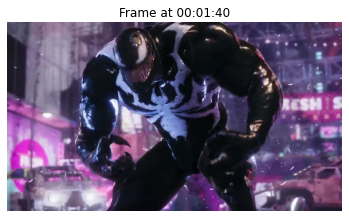

In [8]:
import cv2
import matplotlib.pyplot as plt
import time

video = cv2.VideoCapture('/home/sumit/Videos/PS5.mp4')
# Here I've used downloaded video from youtube - https://www.youtube.com/watch?v=bgqGdIoa52s

# Ask user for timestamp in hh:mm:ss format
timestamp_input = input("Enter timestamp in hh:mm:ss format: ")

# Convert timestamp to seconds 
hours, minutes, seconds = timestamp_input.split(':')
total_seconds = int(hours) * 3600 + int(minutes) * 60 + int(seconds)

# Set video to timestamp position
video.set(cv2.CAP_PROP_POS_MSEC, total_seconds * 1000)
success, frame = video.read() 

if success:
    # Display frame in notebook
    plt.imshow(frame[:, :, ::-1])
    plt.title(f"Frame at {timestamp_input}") 
    plt.axis("off")
    plt.show()
    
    # Save frame to file
    cv2.imwrite(f"frame_at_{timestamp_input}.jpg", frame)
else:
    print("Error capturing frame at", timestamp_input)

video.release()